# Questions/topics we want to cover:

1. In which states were bodycams most and least used? (percentage regarding shootings in that state)
2. Mean age of people shot in all states.
3. Racial indifferences for people shot that were not fleeing, unarmed and didn't have signs of mental health problems. Basically for people that by subjectively assessing these statistics seem to have been most co-operative with law enforcement.
4. Has the percentage/amount of people of specific race shot risen in that timespan?
5. Proportional racial differences in states with highest percentual non-white killings. This means including the percentage of how much each race makes up in that state's population.
6. Links between being shot AND tasered and showing signs of mental health issues.
7. Mean age of people of each race shot.
8. On which date have the shootings occurred the most (regarding day and month, not year).
9. How many unarmed children were shot (in this case a child being younger than 18)?

In [45]:
#Importing modules and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

df = pd.read_csv("shootings.csv")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


1. In which states were bodycams most and least used? (percentage regarding shootings in that state)

In [101]:
df.state = df.state.replace('DC', 'WA')
states = df.state.unique()
percentages = []

most_used_states = []
most_used_percentage = 0
least_used_states = []
least_used_percentage = 100
for state in states:
    bodycam = 0
    event = 0
    for ind in df.index: 
        if (df.state[ind] == state):
            event += 1
            if (df.body_camera[ind] == True):
                bodycam += 1
    percent = round(bodycam/event * 100, 2)
    if (percent == most_used_percentage):
        most_used_states.append(state)
    if (percent == least_used_percentage):
        least_used_states.append(state)
    if (percent > most_used_percentage):
        most_used_states.clear()
        most_used_states.append(state)
        most_used_percentage = percent
    if (percent < least_used_percentage):
        least_used_states.clear()
        least_used_states.append(state)
        least_used_percentage = percent 
    print(state + ' killings: ' + str(event) + ', bodycam: ' + str(bodycam) + ', percentage of bodycams used: ' 
          + str(percent) + '%.')
    percentages.append(percent)

print("Percentually most body cams were used in: " + str(most_used_states) + " with percentage of " + str(most_used_percentage))
print("Percentually least body cams were used in: " + str(least_used_states) + " with percentage of " + str(least_used_percentage))

statedata = pd.DataFrame()
statedata['state'] = states
statedata['bodycam_percentage'] = percentages

fig = go.Figure(data=go.Choropleth(
    locations=statedata['state'], 
    z = statedata['bodycam_percentage'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Inferno', 
    colorbar_title = "Bodycam Usage Density", 
))

fig.update_layout(title_text = 'Body camera usage percentage', geo_scope='usa')

fig.show()

WA killings: 139, bodycam: 15, percetange of bodycams used: 10.79%.
OR killings: 76, bodycam: 4, percetange of bodycams used: 5.26%.
KS killings: 49, bodycam: 3, percetange of bodycams used: 6.12%.
CA killings: 701, bodycam: 103, percetange of bodycams used: 14.69%.
CO killings: 168, bodycam: 18, percetange of bodycams used: 10.71%.
OK killings: 151, bodycam: 24, percetange of bodycams used: 15.89%.
AZ killings: 222, bodycam: 24, percetange of bodycams used: 10.81%.
IA killings: 31, bodycam: 6, percetange of bodycams used: 19.35%.
PA killings: 95, bodycam: 0, percetange of bodycams used: 0.0%.
TX killings: 426, bodycam: 39, percetange of bodycams used: 9.15%.
OH killings: 146, bodycam: 13, percetange of bodycams used: 8.9%.
LA killings: 102, bodycam: 13, percetange of bodycams used: 12.75%.
MT killings: 29, bodycam: 2, percetange of bodycams used: 6.9%.
UT killings: 58, bodycam: 19, percetange of bodycams used: 32.76%.
AR killings: 73, bodycam: 4, percetange of bodycams used: 5.48%.
IL

2. Mean age of people shot in all states.

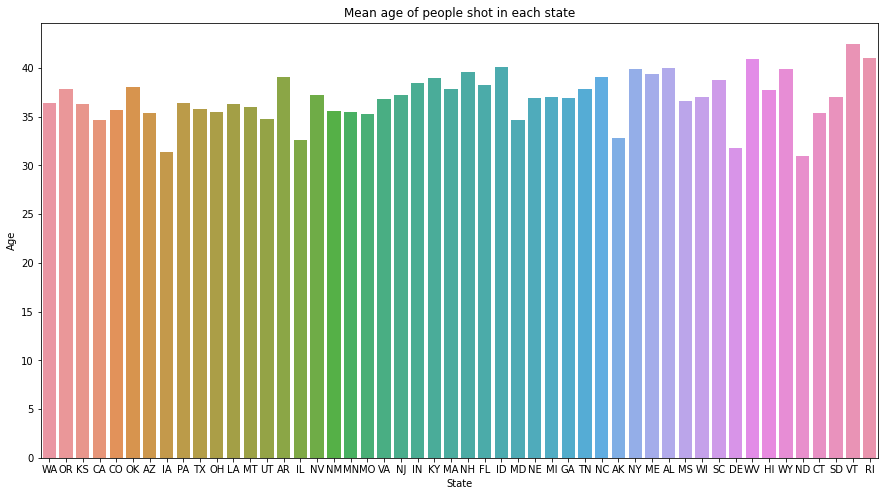

In [53]:
ages = []
for state in states:
    count = 0
    age = 0
    for ind in df.index: 
        if (df.state[ind] == state):
            age += df.age[ind]
            count += 1
    mean = round(age/count, 1)
    ages.append(mean)

statedata['mean_age'] = ages
statedata.head()

plt.figure(figsize = (15,8))
sns.barplot(x='state', y = 'mean_age', data = statedata.drop(columns=["bodycam_percentage"]))
plt.title('Mean age of people shot in each state')
plt.xlabel('State')
plt.ylabel('Age')
plt.show()

3. Racial indifferences for people shot that were not fleeing, were not attacking, were unarmed and didn't have signs of mental health problems. People that by subjectively assessing these statistics seem to have been most co-operative with law enforcement.

In [149]:
cases = []
for ind in df.index:
    if ((df.flee[ind] == 'Not fleeing') & (df.armed[ind] == 'unarmed') & (df.signs_of_mental_illness[ind] == False) & (df.threat_level[ind] != 'attack')):
        cases.append(df.race[ind])
races = df.race.unique()
race_cases = []
for race in races:
    occurence = cases.count(race)
    percentage = round(occurence/len(cases) * 100, 2)
    print("Race: " + race + ", occurence: " + str(occurence) + ", percentage: " + str(percentage))
    race_cases.append(percentage)

fig = px.pie(values=race_cases, names=races, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Race: Asian, occurence: 1, percentage: 1.27
Race: White, occurence: 36, percentage: 45.57
Race: Hispanic, occurence: 16, percentage: 20.25
Race: Black, occurence: 24, percentage: 30.38
Race: Other, occurence: 2, percentage: 2.53
Race: Native, occurence: 0, percentage: 0.0


Pie chart for racial distribution in US

In [73]:
#https://www.pbs.org/newshour/nation/3-ways-that-the-u-s-population-will-change-over-the-next-decade

distribution = [5.83, 59.7, 18.73, 12.54, 0.74, 2.46]
fig = px.pie(values=distribution, names=races, color_discrete_sequence=px.colors.sequential.Plasma_r[::-1])
fig.show()

Considering the fact that people of black race add up to 12.5% of the total population of USA, the last analysis proposing the least dangerous/most co-operative people shot from each race, a total % of 30.4 is fairly high. For other races, the percentages are either the same or smaller.

4. Has the percentage/amount of people of specific race shot changed in that timespan?

In [85]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
shootings = {}
race_dist = {}
years = [2015, 2016, 2017, 2018, 2019, 2020]
for year in years:
    shootings[year] = df["year"].value_counts()[[year]].sum()
print(shootings)
for year in years:
    for race in races:
        count = 0
        for ind in df.index:
            if ((df.race[ind] == race) & (df.year[ind] == year)):
                count += 1
        race_dist[str(year) + ' ' + race] = round(count/shootings.get(year) * 100, 2)
change = {}
for race in races:
    percentages = []
    for year in years:
        percentages.append(race_dist.get(str(year) + ' ' + race))
    change[race] = percentages
print(change)

{2015: 965, 2016: 904, 2017: 906, 2018: 888, 2019: 858, 2020: 374}
{'Asian': [1.45, 1.66, 1.77, 2.36, 2.21, 2.14], 'White': [51.5, 51.77, 50.66, 51.13, 47.09, 51.87], 'Hispanic': [17.82, 17.7, 19.76, 18.58, 19.0, 16.84], 'Black': [26.74, 25.88, 24.72, 25.79, 29.14, 27.54], 'Other': [1.55, 1.22, 0.66, 0.45, 1.05, 0.8], 'Native': [0.93, 1.77, 2.43, 1.69, 1.52, 0.8]}


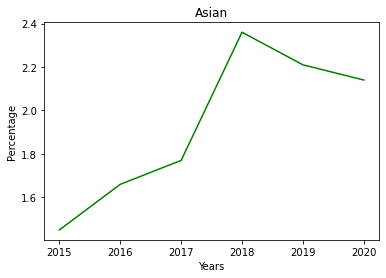

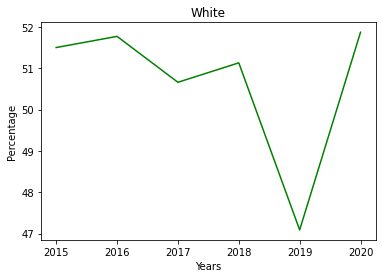

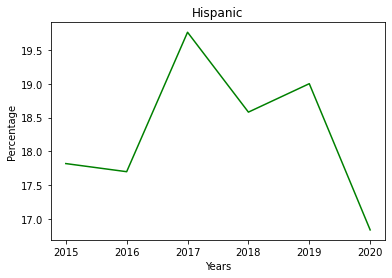

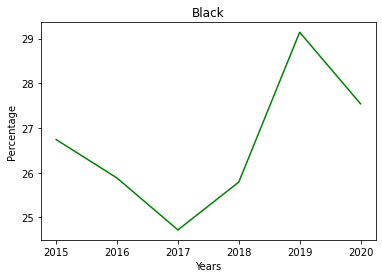

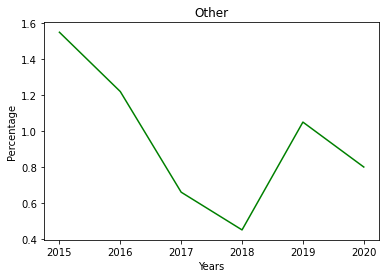

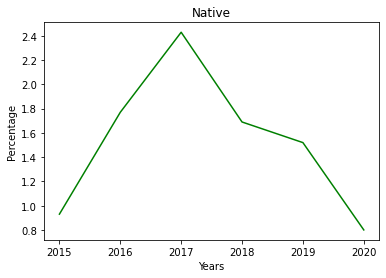

In [100]:
for race in races:
    x = np.array(years)
    y = np.array(change.get(race)) 
    plt.title(race)  
    plt.xlabel("Years")  
    plt.ylabel("Percentage")  
    plt.plot(x, y, color ="green")  
    plt.show()

5. Proportional racial differences in states with highest percentual non-white killings. This means including the percentage of how much non-white races make up in that state's population.

In [120]:
percentages = {}
for state in states:
    white = 0
    other = 0
    for ind in df.index:
        if((df.state[ind] == state) & (df.race[ind] != 'White')):
            other += 1
        if((df.state[ind] == state) & (df.race[ind] == 'White')):
            white += 1
    percentages[state] = round((other / (white + other) * 100), 2)
sorted_percentages = sorted(percentages.items(), key=lambda x: x[1], reverse=True)

top = [i[0] for i in sorted_percentages]
top_percentages = {}
for state in top:
    top_percentages[state] = percentages.get(state)
    if(len(top_percentages) > 4):
        break

In [119]:
#Hawaii, Rhode Island, New Mexico, Illinois, California non-white percentages
#https://datausa.io/
dist_perc = [78.3, 28.6, 61.5, 39.1, 63.4]
race_percentages = {}
for i in range(len(top_percentages)):
    race_percentages[top[i]] = dist_perc[i]
print(race_percentages)
print(top_percentages)

#Biggest differences can be seen in cases of Rhode Island and Illinois. In Rhode Island, the percentage of non-white races
#is 28.6%, yet 75% of the fatal shootings have included non-white races. In Illinois, the percentage of non-white races
#is 39.1%, yet 71.72% of the fatal shootings have included non-white races.

{'HI': 78.3, 'RI': 28.6, 'NM': 61.5, 'IL': 39.1, 'CA': 63.4}
{'HI': 89.66, 'RI': 75.0, 'NM': 72.04, 'IL': 71.72, 'CA': 68.47}


6. Links between being shot AND tasered and showing signs of mental health issues.

In [131]:
tasered_and_mentally_ill = 0
tasered = 0
mentally_ill = 0
for ind in df.index:
    if ((df.manner_of_death[ind] == 'shot and Tasered') & (df.signs_of_mental_illness[ind] == True)):
        tasered_and_mentally_ill += 1
    if (df.manner_of_death[ind] == 'shot and Tasered'):
        tasered += 1
    if (df.signs_of_mental_illness[ind] == True):
        mentally_ill += 1

print(str(tasered) + " people were shot and tasered, out of which " + str(tasered_and_mentally_ill) + " people were mentally ill as well.")
print("There were a total of " + str(mentally_ill) + " assumingly mentally ill people.")
print("Mentally ill people shot made up to " + str(round(mentally_ill/len(df) * 100, 2)) + "% of all people shot.")
print("Mentally ill people shot and tasered made up to " + str(round(tasered_and_mentally_ill/tasered * 100, 2)) + "% of all people shot and tasered.")

248 people were shot and tasered, out of which 80 people were mentally ill as well.
There were a total of 1103 assumingly mentally ill people.
Mentally ill people shot made up to 22.53% of all people shot.
Mentally ill people shot and tasered made up to 32.26% of all people shot and tasered.


7. Mean age of people of each race shot.

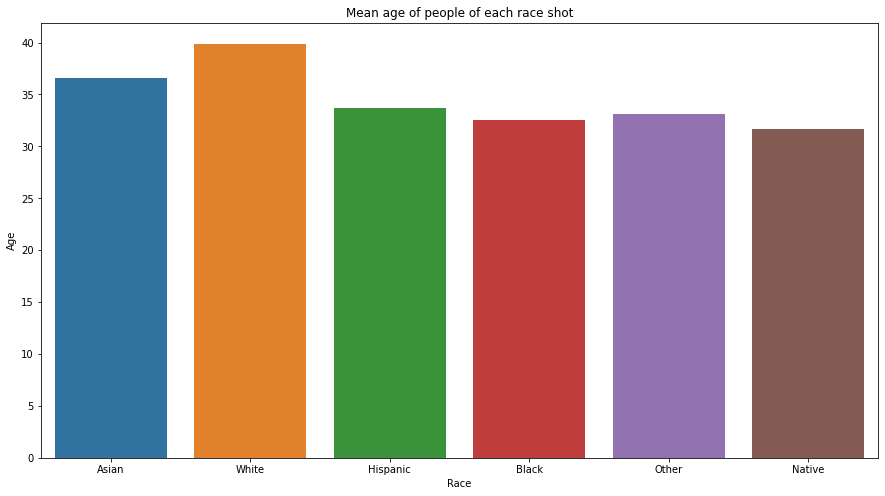

In [135]:
ages = []
for race in races:
    age = 0
    count = 0
    for ind in df.index:
        if(df.race[ind] == race):
            age += df.age[ind]
            count += 1
    mean = round(age/count, 1)
    ages.append(mean)
    

racedata = pd.DataFrame()
racedata['race'] = races
racedata['mean_age'] = ages

plt.figure(figsize = (15,8))
sns.barplot(x='race', y = 'mean_age', data = racedata)
plt.title('Mean age of people of each race shot')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()    

8. On which date have the shootings occurred the most (regarding day and month, not year).

In [139]:
months = sorted(df.month.unique())
days = sorted(df.day.unique())

shootings = {}
for month in months:
    for day in days:
        occurence = 0
        for ind in df.index:
            if ((df.month[ind] == month) & (df.day[ind] == day)):
                occurence += 1
        shootings[str(day) + '. ' + str(month)] = occurence

{'1. 1': 15, '2. 1': 16, '3. 1': 11, '4. 1': 16, '5. 1': 22, '6. 1': 25, '7. 1': 19, '8. 1': 12, '9. 1': 9, '10. 1': 9, '11. 1': 20, '12. 1': 16, '13. 1': 11, '14. 1': 18, '15. 1': 22, '16. 1': 24, '17. 1': 17, '18. 1': 15, '19. 1': 12, '20. 1': 15, '21. 1': 16, '22. 1': 15, '23. 1': 24, '24. 1': 18, '25. 1': 12, '26. 1': 13, '27. 1': 21, '28. 1': 25, '29. 1': 14, '30. 1': 14, '31. 1': 9, '1. 2': 16, '2. 2': 13, '3. 2': 20, '4. 2': 21, '5. 2': 13, '6. 2': 13, '7. 2': 18, '8. 2': 15, '9. 2': 18, '10. 2': 25, '11. 2': 14, '12. 2': 12, '13. 2': 20, '14. 2': 20, '15. 2': 13, '16. 2': 18, '17. 2': 18, '18. 2': 11, '19. 2': 11, '20. 2': 14, '21. 2': 19, '22. 2': 16, '23. 2': 20, '24. 2': 14, '25. 2': 15, '26. 2': 23, '27. 2': 11, '28. 2': 17, '29. 2': 4, '30. 2': 0, '31. 2': 0, '1. 3': 15, '2. 3': 17, '3. 3': 8, '4. 3': 14, '5. 3': 18, '6. 3': 17, '7. 3': 15, '8. 3': 14, '9. 3': 16, '10. 3': 17, '11. 3': 19, '12. 3': 20, '13. 3': 24, '14. 3': 19, '15. 3': 12, '16. 3': 19, '17. 3': 15, '18. 3

In [141]:
sorted_dates = sorted(shootings.items(), key=lambda x: x[1], reverse=True)
sorted_dates
#According to the list there were six dates with no fatal shootings registered, however these dates do not exist.
#Least fatal date was the 9th of October, with 4 overall fatal shootings. With 29 fatal shootings, 27th of March was the
#most fatal date.

[('27. 3', 29),
 ('6. 1', 25),
 ('28. 1', 25),
 ('10. 2', 25),
 ('16. 1', 24),
 ('23. 1', 24),
 ('13. 3', 24),
 ('19. 3', 24),
 ('5. 7', 24),
 ('26. 2', 23),
 ('29. 4', 23),
 ('5. 1', 22),
 ('15. 1', 22),
 ('7. 5', 22),
 ('6. 6', 22),
 ('27. 1', 21),
 ('4. 2', 21),
 ('24. 3', 21),
 ('5. 8', 21),
 ('11. 1', 20),
 ('3. 2', 20),
 ('13. 2', 20),
 ('14. 2', 20),
 ('23. 2', 20),
 ('12. 3', 20),
 ('9. 5', 20),
 ('29. 6', 20),
 ('3. 7', 20),
 ('7. 7', 20),
 ('17. 7', 20),
 ('7. 1', 19),
 ('21. 2', 19),
 ('11. 3', 19),
 ('14. 3', 19),
 ('16. 3', 19),
 ('1. 4', 19),
 ('3. 5', 19),
 ('4. 11', 19),
 ('5. 11', 19),
 ('12. 12', 19),
 ('21. 12', 19),
 ('14. 1', 18),
 ('24. 1', 18),
 ('7. 2', 18),
 ('9. 2', 18),
 ('16. 2', 18),
 ('17. 2', 18),
 ('5. 3', 18),
 ('20. 3', 18),
 ('5. 4', 18),
 ('15. 4', 18),
 ('14. 5', 18),
 ('19. 5', 18),
 ('21. 5', 18),
 ('29. 5', 18),
 ('3. 6', 18),
 ('9. 6', 18),
 ('4. 7', 18),
 ('23. 7', 18),
 ('1. 8', 18),
 ('15. 11', 18),
 ('10. 12', 18),
 ('17. 1', 17),
 ('28. 2',

9. How many unarmed children were shot (in this case a child being younger than 18)?

In [148]:
occurences = 0
names = []
for ind in df.index:
    if ((df.age[ind] < 18) & (df.armed[ind] == 'unarmed')):
        names.append((df.name[ind], df.age[ind]))
for i in names:
    print(i)
print(str(len(names)) + ' unarmed children under the age of 18 were fatally shot by a US police officer between 2015 and 2020.')

('Deven Guilford', 17.0)
('Jeremy Mardis', 6.0)
('Ciara Meyer', 12.0)
('David Joseph', 17.0)
('Jose Raul Cruz', 16.0)
('Elena "Ebbie" Mondragon', 16.0)
('Isaiah Murrietta-Golding', 16.0)
('Sariah Marie Lane', 17.0)
('Jordan Edwards', 15.0)
('Armando Garcia-Muro', 17.0)
('Kameron Prescott', 6.0)
('Joseph Edward Haynes', 16.0)
('Antwon Rose', 17.0)
('Isaiah Lewis', 17.0)
14 unarmed children under the age of 18 were fatally shot by a US police officer between 2015 and 2020.
